In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data.sampler import SubsetRandomSampler
import cv2
from PIL import Image
import os 
import time
import helper

--2020-11-08 14:53:08--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [31]:
preprocess = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder('Data/', transform=preprocess)

#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [34]:
batch_size = 8
random_seed = 42
validation_split = 0.2
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
np.random.seed(random_seed)
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)

<AxesSubplot:>

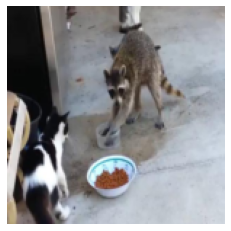

In [35]:
images, labels = next(iter(train_loader))
helper.imshow(images[0], normalize=False)

In [36]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 35 * 35, 256)
        self.fc2 = nn.Linear(256, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.dropout1(self.pool(F.relu(self.conv1(x))))
        x = self.dropout1(self.pool(F.relu(self.conv2(x))))
        x = x.view(-1, 32 * 35 * 35)
        x = self.dropout2(F.relu(self.fc1(x)))
        x = F.softmax(self.fc2(x))
        return x


model = Model()

In [37]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [38]:
for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 8 == 0:    # print every 8 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Finished Training')

/home/sowrya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 0.700
[1,     9] loss: 5.542
[1,    17] loss: 5.492
[1,    25] loss: 5.298
[1,    33] loss: 4.952
[1,    41] loss: 5.267
[2,     1] loss: 0.772
[2,     9] loss: 5.237
[2,    17] loss: 5.025
[2,    25] loss: 5.037
[2,    33] loss: 4.950
[2,    41] loss: 4.806
[3,     1] loss: 0.564
[3,     9] loss: 4.515
[3,    17] loss: 4.359
[3,    25] loss: 4.393
[3,    33] loss: 4.467
[3,    41] loss: 3.862
[4,     1] loss: 0.424
[4,     9] loss: 3.774
[4,    17] loss: 3.498
[4,    25] loss: 3.329
[4,    33] loss: 3.511
[4,    41] loss: 3.093
[5,     1] loss: 0.342
[5,     9] loss: 3.042
[5,    17] loss: 3.034
[5,    25] loss: 3.105
[5,    33] loss: 3.088
[5,    41] loss: 2.864
[6,     1] loss: 0.391
[6,     9] loss: 3.050
[6,    17] loss: 2.883
[6,    25] loss: 2.960
[6,    33] loss: 2.746
[6,    41] loss: 2.961
[7,     1] loss: 0.355
[7,     9] loss: 3.111
[7,    17] loss: 2.626
[7,    25] loss: 2.894
[7,    33] loss: 3.035
[7,    41] loss: 2.876
[8,     1] loss: 0.343
[8,     9] 

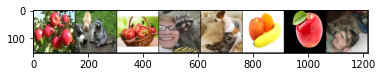

GroundTruth:  non-racoon racoon non-racoon racoon racoon non-racoon non-racoon racoon
Predicted:  non-racoon racoon non-racoon racoon non-racoon non-racoon non-racoon racoon


/home/sowrya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [40]:
import numpy as np
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ['non-racoon', 'racoon']
dataiter = iter(validation_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

In [43]:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

/home/sowrya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the test images: 98 %


In [42]:
PATH = './CNN1.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
def grad_CAM_plus(filename, label_id, output_filename):
    g = tf.get_default_graph()
	init = tf.global_variables_initializer()
	# Run tensorflow 
	sess = tf.Session()

	#define your tensor placeholders for, labels and images
	label_vector = tf.placeholder("float", [None, 1000])
	input_image = tf.placeholder("float", [1, 224, 224, 3])
	label_index = tf.placeholder("int64", ())

	#load vgg16 model
	vgg = vgg16.Vgg16()
	with tf.name_scope("content_vgg"):
	    vgg.build(input_image)
	#prob = tf.placeholder("float", [None, 1000])

	#get the output neuron corresponding to the class of interest (label_id)
	cost = vgg.fc8*label_vector

	# Get last convolutional layer gradients for generating gradCAM++ visualization
	target_conv_layer = vgg.conv5_3
	target_conv_layer_grad = tf.gradients(cost, target_conv_layer)[0]
	
	#first_derivative
	first_derivative = tf.exp(cost)[0][label_index]*target_conv_layer_grad 	
	
	#second_derivative
	second_derivative = tf.exp(cost)[0][label_index]*target_conv_layer_grad*target_conv_layer_grad 

	#triple_derivative
	triple_derivative = tf.exp(cost)[0][label_index]*target_conv_layer_grad*target_conv_layer_grad*target_conv_layer_grad  

	sess.run(init)

	img1 = vgg_utils.load_image(filename)
		
	output = [0.0]*vgg.prob.get_shape().as_list()[1] #one-hot embedding for desired class activations
		#creating the output vector for the respective class
	
	if label_id == -1:
		prob_val = sess.run(vgg.prob, feed_dict={input_image:[img1]})
		vgg_utils.print_prob(prob_val[0], './synset.txt')
		#creating the output vector for the respective class
		index = np.argmax(prob_val)
		orig_score = prob_val[0][index]
		print ("Predicted_class: ", index)
		output[index] = 1.0
		label_id = index
	else:
		output[label_id] = 1.0	
	output = np.array(output)
	print (label_id)
	conv_output, conv_first_grad, conv_second_grad, conv_third_grad = sess.run([target_conv_layer, first_derivative, second_derivative, triple_derivative], feed_dict={input_image:[img1], label_index:label_id, label_vector: output.reshape((1,-1))})
	
	global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

	alpha_num = conv_second_grad[0]
	alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
	alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
	alphas = alpha_num/alpha_denom

	weights = np.maximum(conv_first_grad[0], 0.0)
	#normalizing the alphas
	"""	
	alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)
	
	alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
	"""

	alphas_thresholding = np.where(weights, alphas, 0.0)

	alpha_normalization_constant = np.sum(np.sum(alphas_thresholding, axis=0),axis=0)
	alpha_normalization_constant_processed = np.where(alpha_normalization_constant != 0.0, alpha_normalization_constant, np.ones(alpha_normalization_constant.shape))


	alphas /= alpha_normalization_constant_processed.reshape((1,1,conv_first_grad[0].shape[2]))


	
	deep_linearization_weights = np.sum((weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)
	#print deep_linearization_weights
	grad_CAM_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

	# Passing through ReLU
	cam = np.maximum(grad_CAM_map, 0)
	cam = cam / np.max(cam) # scale 0 to 1.0   
	print("\nCam Shape Before:")
	print(cam.shape)	
	cam = resize(cam, (224,224))
	# Passing through ReLU
	#cam = np.maximum(grad_CAM_map, 0)
	#cam = cam / np.max(cam) # scale 0 to 1.0    
	#cam = resize(cam, (224,224))


	gb = guided_BP([img1], label_id)
	visualize(img1, cam, output_filename, gb) 
	return cam